In [48]:
# Descomente para instalar as bibliotecas utilizadas neste material
# !pip install -U qiskit
# !pip install qiskit[visualization]
# !pip install numpy
# !pip install math

In [49]:
# Verificação de versão do qiskit
# Notebook originalmente executado na versão 1.2.2 do qiskit e 3.12.7 do python
from qiskit.version import get_version_info as qiskitVersion
print(qiskitVersion())

1.2.2


In [50]:
# Importação dos módulos específicos a serem utilizados durante a elaboração do circuito
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from math import pi

Criação do circuito de 3 qubits, e posterior adição de portas hadamard

In [51]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

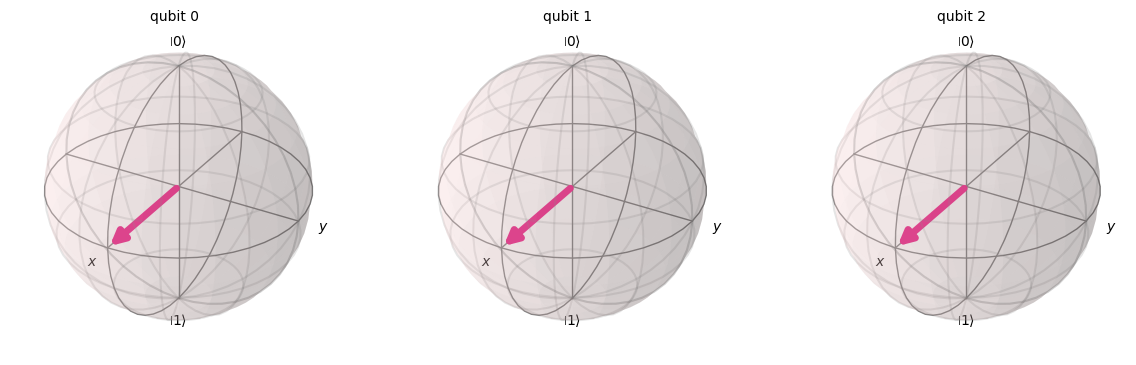

In [52]:
# Utilizado para desenhar as esferas de bloch do circuito
plot_bloch_multivector(Statevector(qc))

Aplicação de rotações teste
No primeiro (0) qubit aplicamos uma rotação z de 135 graus radianos
No segundo (1) qubit aplicamos uma rotação y de 45 graus radianos
No terceiro (2) qubit aplicamos uma rotação y de -45 graus radianos e uma rotação x de 45 graus radianos

In [53]:
qc.rz(3*pi/4,0)
qc.ry(pi/4,1)
qc.ry(-pi/4,2)
qc.rx(pi/4,2)

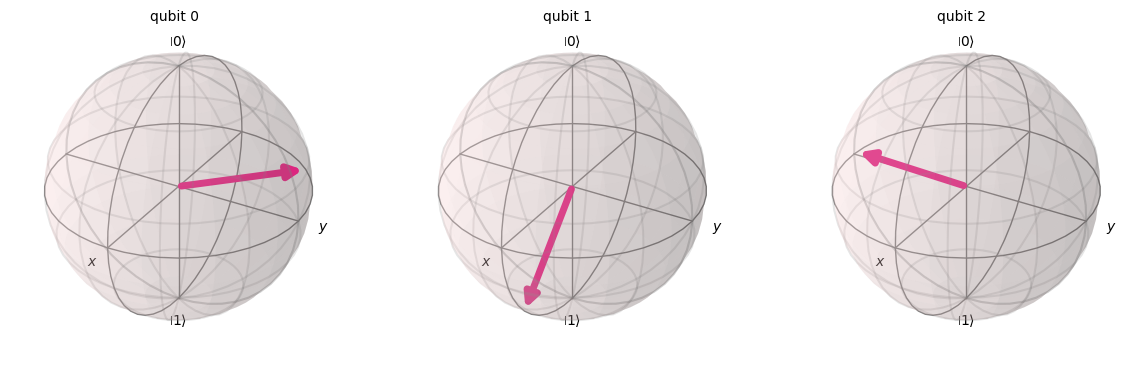

In [54]:
# Visualização das esferas pós rotações de teste
plot_bloch_multivector(Statevector(qc))

In [55]:
# Medição de todos os qubits
qc.measure_all()

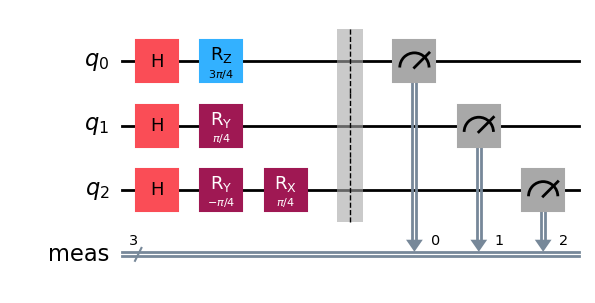

In [56]:
# Desenhar o circuito final
qc.draw("mpl")

In [57]:
# Execução do ciruito via simulador
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots=1024)
result = job.result()

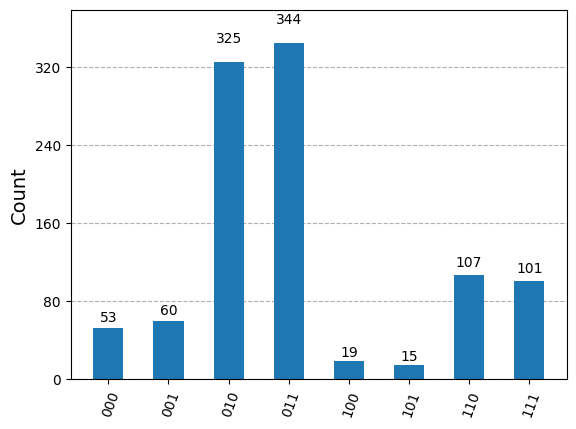

In [58]:
# Obtenção e visualização dos resultados, via histograma
counts = result.get_counts(qc)
plot_histogram(counts)

In [59]:
# Importações utilizadas no circuito de Grover
from qiskit.circuit.library import DiagonalGate
import numpy as np
from math import sqrt,floor

Código completo para execução do algorítmo de grover

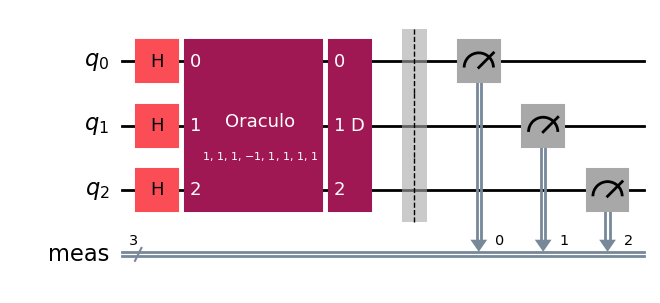

In [60]:
# Declaração de parâmetros iniciais
N=3
faseBuscada='011'

#preparação da matriz de rotaço
diagonalMatrizRotacao = -np.ones(2**N,dtype=int)
diagonalMatrizRotacao[0] = 1
matrizRotacao = DiagonalGate(diagonalMatrizRotacao)
matrizRotacao.name = 'R'

#preparação da matriz de difusão
matrizDifusao = QuantumCircuit(N, name='D')
matrizDifusao.h(range(N))
matrizDifusao.append(matrizRotacao,range(N))
matrizDifusao.h(range(N))

#preparação do oráculo
rotacaoFase = np.ones(2**N,dtype=int)
rotacaoFase[int(faseBuscada,2)] = -1
oraculo = DiagonalGate(rotacaoFase)
oraculo.name='oraculo'

#Passo 1
Grover = QuantumCircuit(N)
Grover.h(range(N))

#passo 2
for i in range(floor(sqrt(N))):
    #etapa I
    Grover.append(oraculo,range(N))
    #etapa II
    Grover.append(matrizDifusao,range(N))

#passo 3
Grover.measure_all()

Grover.draw('mpl')

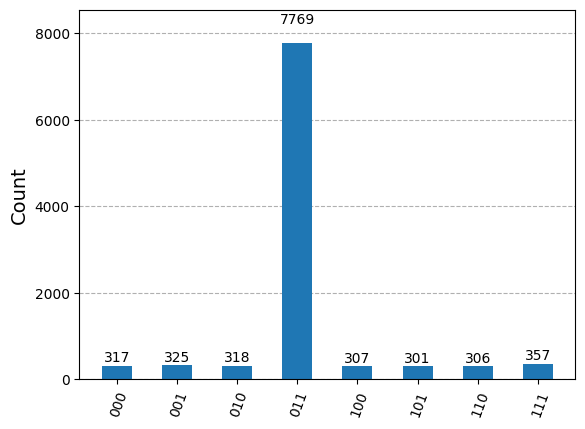

In [61]:
# Execução e plot dos resultados, backendo utilizado da seção anterior
new_circuit = transpile(Grover, backend)
job = backend.run(new_circuit, shots=10000)
result = job.result()

counts = result.get_counts(Grover)
plot_histogram(counts)

Algoritmo de Grover adaptado para duas buscas simultâneas

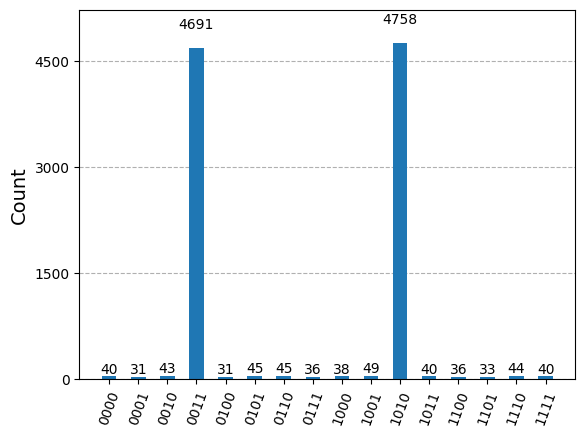

In [62]:
N=4
faseBuscada=['0011','1010']

#preparação da matriz de rotaço
diagonalMatrizRotacao = -np.ones(2**N,dtype=int)
diagonalMatrizRotacao[0] = 1
matrizRotacao = DiagonalGate(diagonalMatrizRotacao)
matrizRotacao.name = 'R'

#preparação da matriz de difusão
matrizDifusao = QuantumCircuit(N, name='D')
matrizDifusao.h(range(N))
matrizDifusao.append(matrizRotacao,range(N))
matrizDifusao.h(range(N))

#preparação do oráculo
rotacaoFase = np.ones(2**N,dtype=int)
#rotaciona cada estado buscado
for estado in faseBuscada:
    rotacaoFase[int(estado,2)] = -1
oraculo = DiagonalGate(rotacaoFase)
oraculo.name='oraculo'

#Passo 1
Grover = QuantumCircuit(N)
Grover.h(range(N))

#passo 2
for i in range(floor(sqrt(N))):
    #etapa I
    Grover.append(oraculo,range(N))
    #etapa II
    Grover.append(matrizDifusao,range(N))

#passo 3
Grover.measure_all()

new_circuit = transpile(Grover, backend)
job = backend.run(new_circuit, shots=10000)
result = job.result()

counts = result.get_counts(Grover)
plot_histogram(counts)